In [1]:
import data_analysis
import pandas as pd
import tensorflow as tf
import string
import numpy as np
import spacy
import data_analysis
import re

from spacy.lang.en.stop_words import STOP_WORDS

In [3]:
df = pd.read_json(open("final_dataset/merged_dset.json", "r", encoding="utf8"))

print(df.info())
print('\n')
print(df.describe())
print('\n')
print(df.isna().sum())
print('\n')
print(df['themes'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17074 entries, 0 to 17073
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   17074 non-null  object
 1   url     17074 non-null  object
 2   author  17074 non-null  object
 3   year    17074 non-null  int64 
 4   text    17074 non-null  object
 5   themes  17074 non-null  object
dtypes: int64(1), object(5)
memory usage: 933.7+ KB
None


               year
count  17074.000000
mean    1992.636113
std       53.657173
min      213.000000
25%     1990.000000
50%     2011.000000
75%     2016.000000
max     2021.000000


title     0
url       0
author    0
year      0
text      0
themes    0
dtype: int64


0                                          [audio & music]
1                                            [lust, lgbtq]
2                                         [dreams, flight]
3                                        [arts & sciences]
4                         [violence, art

In [4]:
topics = data_analysis.scrape_topics()
print(topics)

['afterlife', 'aging', 'ambition', 'america', 'american revolution', 'americana', 'ancestry', 'anger', 'animals', 'anxiety', 'apocalypse', 'audio', 'beauty', 'beginning', 'birds', 'body', 'brothers', 'buildings', 'carpe diem', 'cats', 'childhood', 'cities', 'civil war', 'clothing', 'cooking', 'creation', 'dance', 'daughters', 'death', 'deception', 'desire', 'despair', 'divorce', 'dogs', 'doubt', 'dreams', 'drinking', 'drugs', 'earth', 'eating', 'economy', 'enemies', 'environment', 'existential', 'family', 'fathers', 'flight', 'flowers', 'for children', 'for mom', 'for teens', 'friendship', 'future', 'gardens', 'gender', 'ghosts', 'gratitude', 'grief', 'gun violence', 'happiness', 'heartache', 'heroes', 'high school', 'history', 'home', 'hope', 'humor', 'identity', 'illness', 'immigration', 'incarceration', 'infidelity', 'innocence', 'jealousy', 'lgbtq', 'landscapes', 'language', 'loneliness', 'loss', 'love', 'love, contemporary', 'luck', 'lust', 'marriage', 'math', 'memories', 'migrati

In [5]:
encoded_topics = data_analysis.encode_topics(topics)
print(encoded_topics)

{'afterlife': 0, 'aging': 1, 'ambition': 2, 'america': 3, 'american revolution': 4, 'americana': 5, 'ancestry': 6, 'anger': 7, 'animals': 8, 'anxiety': 9, 'apocalypse': 10, 'audio': 11, 'beauty': 12, 'beginning': 13, 'birds': 14, 'body': 15, 'brothers': 16, 'buildings': 17, 'carpe diem': 18, 'cats': 19, 'childhood': 20, 'cities': 21, 'civil war': 22, 'clothing': 23, 'cooking': 24, 'creation': 25, 'dance': 26, 'daughters': 27, 'death': 28, 'deception': 29, 'desire': 30, 'despair': 31, 'divorce': 32, 'dogs': 33, 'doubt': 34, 'dreams': 35, 'drinking': 36, 'drugs': 37, 'earth': 38, 'eating': 39, 'economy': 40, 'enemies': 41, 'environment': 42, 'existential': 43, 'family': 44, 'fathers': 45, 'flight': 46, 'flowers': 47, 'for children': 48, 'for mom': 49, 'for teens': 50, 'friendship': 51, 'future': 52, 'gardens': 53, 'gender': 54, 'ghosts': 55, 'gratitude': 56, 'grief': 57, 'gun violence': 58, 'happiness': 59, 'heartache': 60, 'heroes': 61, 'high school': 62, 'history': 63, 'home': 64, 'hop

In [6]:
row = df['themes'][1]
print(row)
encoded = data_analysis.encode_column(row)
print(encoded)

['lust', 'lgbtq']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [7]:
df = df[df['themes'].notna()]
df['themes'] = df['themes'].apply(data_analysis.encode_column)
print(df['themes'])

0        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                               ...                        
17069    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
17070    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
17071    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
17072    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
17073    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: themes, Length: 17074, dtype: object


#### Using added functions to clear df and encode authors

In [8]:
df.head()

,title,url,author,year,text,themes
0,Body and Soul II,https://poets.org/poem/body-and-soul-ii,Charles Wright,2002,(for Coleman Hawkins)\nThe structure of landsc...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,Novel,https://poets.org/poem/novel,Arthur Rimbaud,2002,I.\n\nNo one's serious at seventeen.\n—On beau...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,Flying,https://poets.org/poem/flying,Sarah Arvio,2002,One said to me tonight or was it day \nor was ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,Photograph of People Dancing in France,https://poets.org/poem/photograph-people-danci...,Leslie Adrienne Miller,2002,It's true that you don't know them--nor do I \...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,War Photograph,https://poets.org/poem/war-photograph,Kate Daniels,2002,A naked child is running\nalong the path towar...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [9]:
df.shape

(17074, 6)

In [10]:
df = data_analysis.clear_nans(df)
df.shape

(17074, 6)

In [11]:
df.isna().sum()

title     0
url       0
author    0
year      0
text      0
themes    0
dtype: int64

In [12]:
df

,title,url,author,year,text,themes
0,Body and Soul II,https://poets.org/poem/body-and-soul-ii,Charles Wright,2002,(for Coleman Hawkins)\nThe structure of landsc...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,Novel,https://poets.org/poem/novel,Arthur Rimbaud,2002,I.\n\nNo one's serious at seventeen.\n—On beau...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,Flying,https://poets.org/poem/flying,Sarah Arvio,2002,One said to me tonight or was it day \nor was ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,Photograph of People Dancing in France,https://poets.org/poem/photograph-people-danci...,Leslie Adrienne Miller,2002,It's true that you don't know them--nor do I \...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,War Photograph,https://poets.org/poem/war-photograph,Kate Daniels,2002,A naked child is running\nalong the path towar...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...
17069,You Can't Buy Shoes in a Painting,https://www.poetryfoundation.org/poetrymagazin...,Jill Osier,1990,You can't even buy a soda. You can only\n\r se...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
17070,You People,https://www.poetryfoundation.org/poetrymagazin...,Nance Van Winckel,1990,"People, don't ask me again where my shoes are....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
17071,You That I Loved,https://www.poetryfoundation.org/poetrymagazin...,A. F. Moritz,2005,"You that I loved all my life long, \nyou are n...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
17072,Your Clothes,https://www.poetryfoundation.org/poetrymagazin...,Judith Kroll,1990,"Of course they are empty shells, without hope ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [13]:
df = data_analysis.init_author_encoding(df)
df.head()

,title,url,author,year,text,themes
0,Body and Soul II,https://poets.org/poem/body-and-soul-ii,602,2002,(for Coleman Hawkins)\nThe structure of landsc...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,Novel,https://poets.org/poem/novel,311,2002,I.\n\nNo one's serious at seventeen.\n—On beau...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,Flying,https://poets.org/poem/flying,3478,2002,One said to me tonight or was it day \nor was ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,Photograph of People Dancing in France,https://poets.org/poem/photograph-people-danci...,2361,2002,It's true that you don't know them--nor do I \...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,War Photograph,https://poets.org/poem/war-photograph,2125,2002,A naked child is running\nalong the path towar...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


###  Text preprocessing

In [14]:
#  set up data types
df = df.astype({'text': 'str', 'year': 'int32'})

#  change the texts to lowercase
df['text'] = df['text'].str.lower()
df['title'] = df['title'].str.lower()

# Drop empty texts
df['text'].replace('', np.nan, inplace=True)
df.dropna(subset=['text'], inplace=True)

#  Remove punctuation
table = str.maketrans('', '', string.punctuation)
df['text'] = [row['text'].translate(table) for index, row in df.iterrows()]
df['title'] = [row['title'].translate(table) for index, row in df.iterrows()]


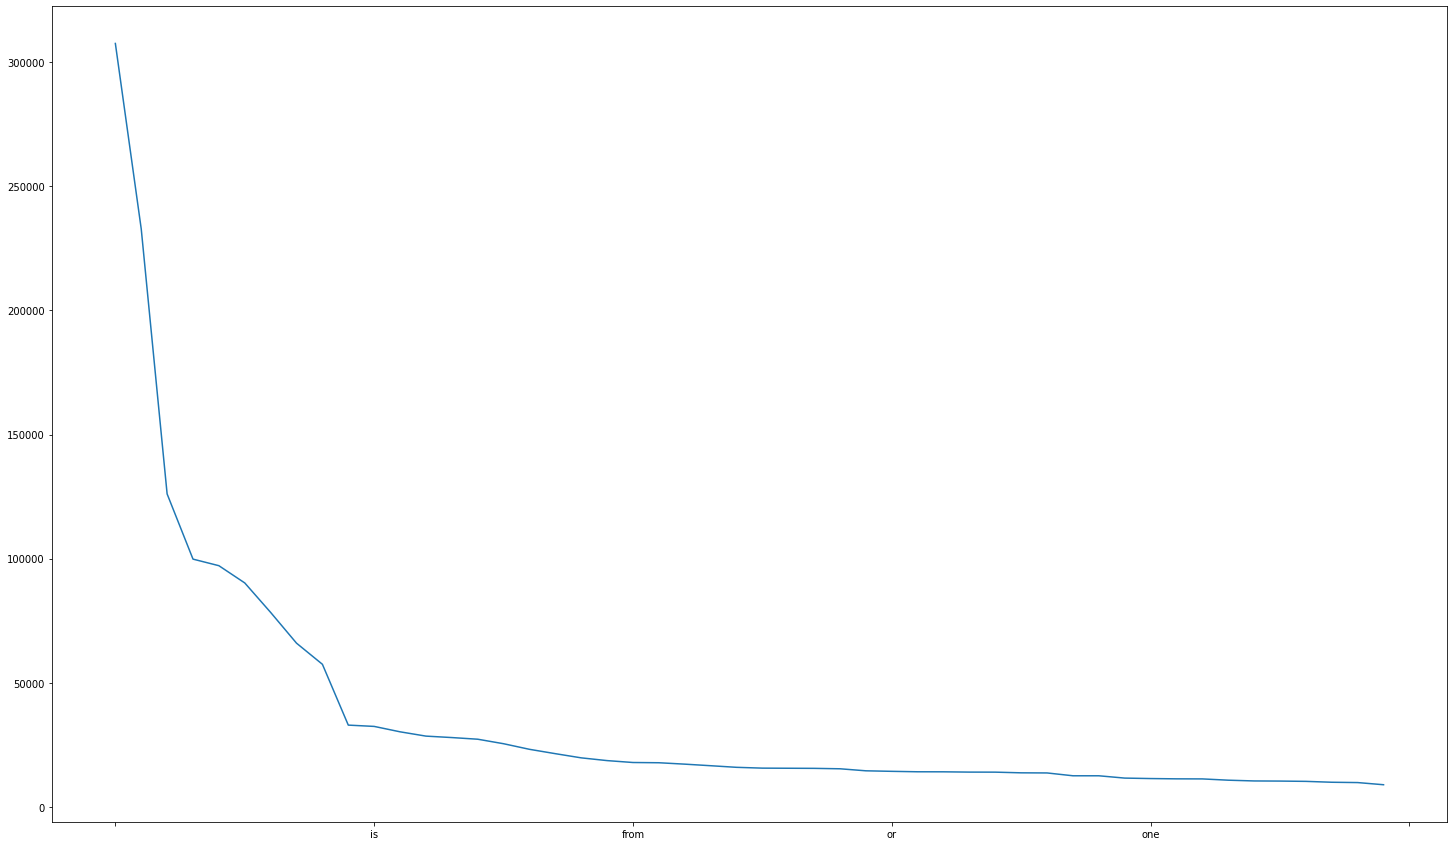

In [15]:
#  Plot the words distribution
freq = pd.Series(' '.join(df['text']).split(' ')).value_counts()
freq[:50].plot(figsize=(25, 15))

In [16]:
#  Remove stopwords
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in STOP_WORDS))

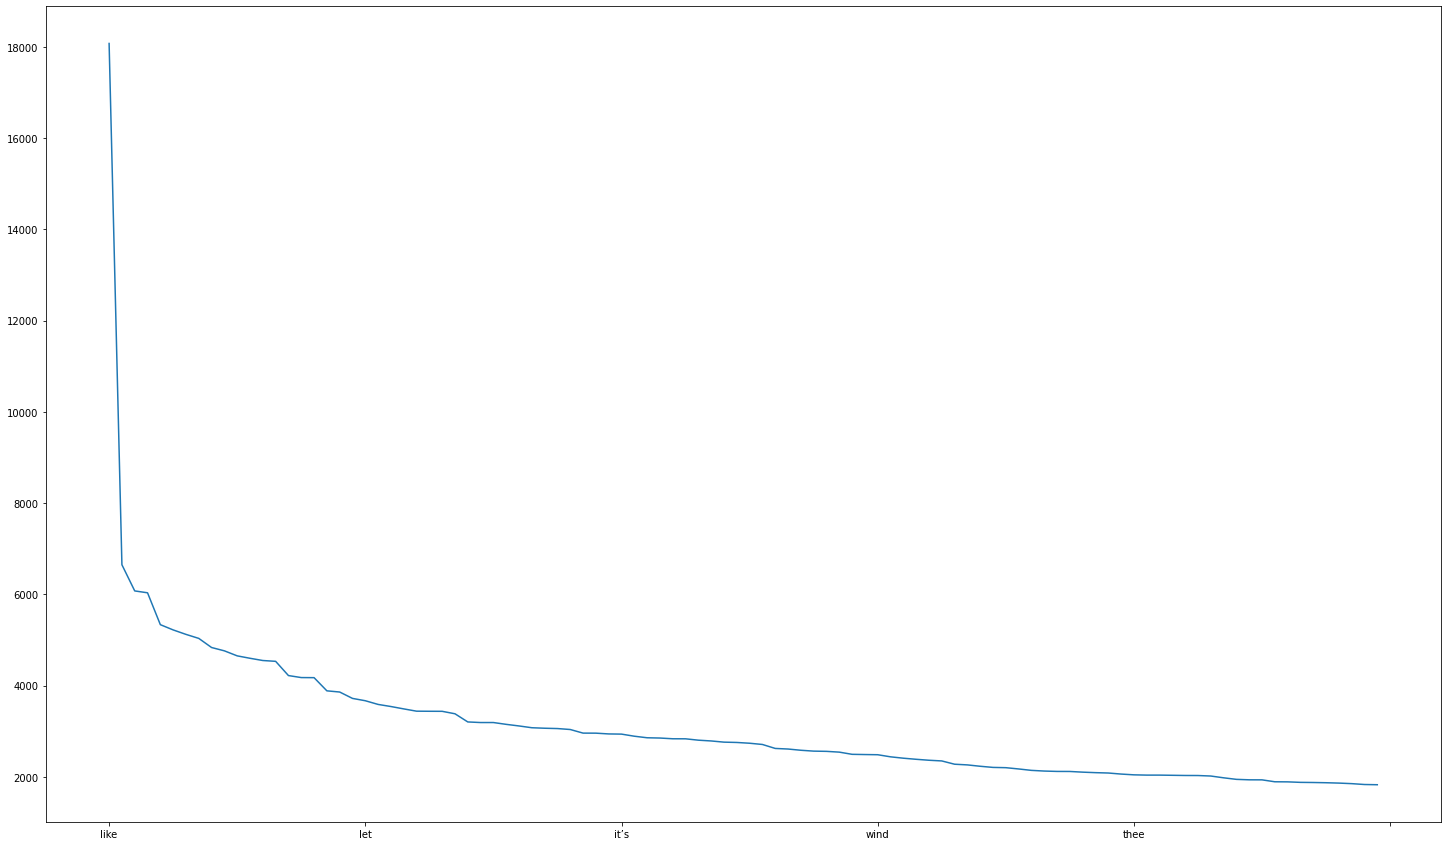

In [17]:
#  Words distribution after stop words removing
freq = pd.Series(' '.join(df['text']).split(' ')).value_counts()
freq[:100].plot(figsize=(25, 15))

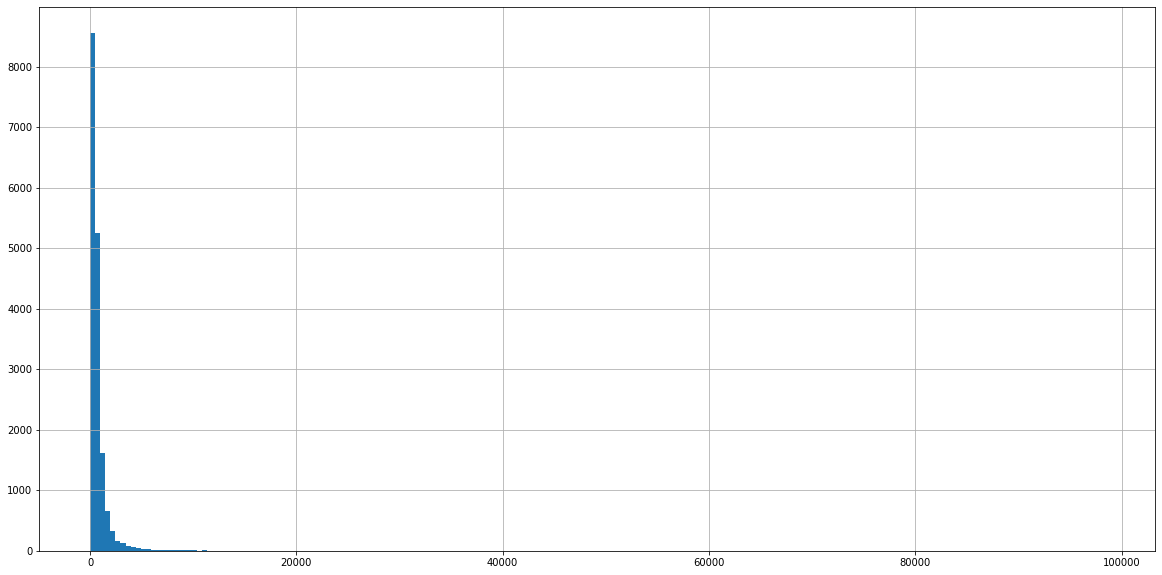

In [18]:
#  Texts length distribution
texts_len = df['text'].apply(len)
texts_len.hist(bins=200, figsize=(20, 10))

In [19]:
#  Set max text length
df['text'] = [row['text'][:1000] for index, row in df.iterrows()]
df['text'] = [row['text'].rsplit(' ', 1)[0] for index, row in df.iterrows()]

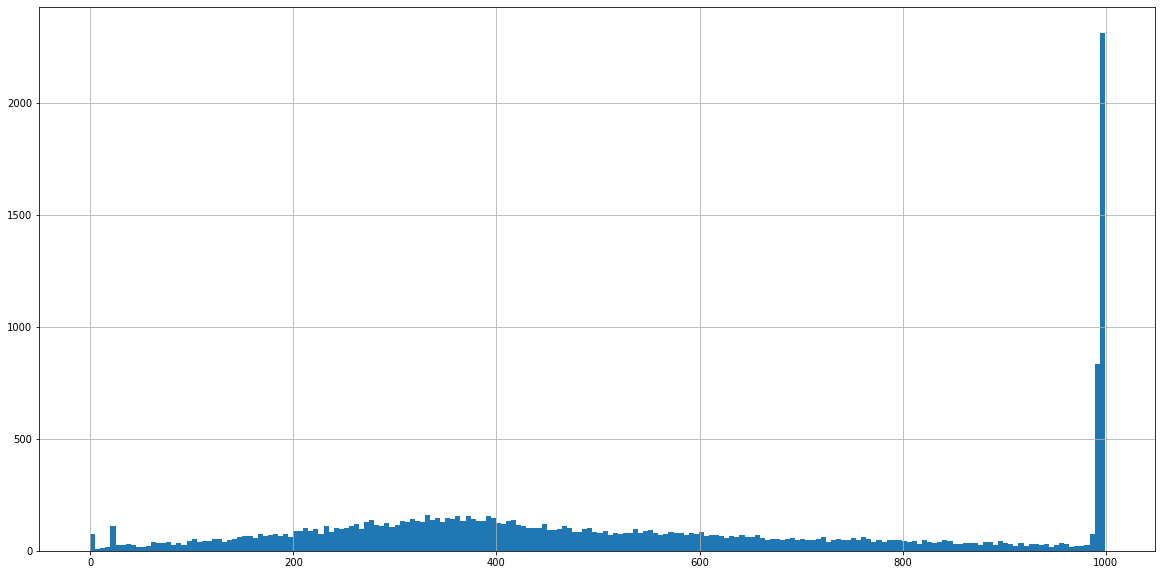

In [20]:
#  Texts length distribution after max setted up
texts_len = df['text'].apply(len)
texts_len.hist(bins=200, figsize=(20, 10))

In [21]:
#  Lemmatization
nlp = spacy.load("en_core_web_sm")
lemmatizer = nlp.get_pipe("lemmatizer")

df['text'] = [
                [token.lemma_ for token in nlp(row['text'])]
                for index, row in df.iterrows()
             ]
df['title'] = [
                [token.lemma_ for token in nlp(row['title'])]
                for index, row in df.iterrows()
             ]
print(df.head())

                                         title  \
0                        [body, and, soul, ii]   
1                                      [novel]   
2                                        [fly]   
3  [photograph, of, people, dance, in, france]   
4                            [war, photograph]   

                                                 url  author  year  \
0            https://poets.org/poem/body-and-soul-ii     602  2002   
1                       https://poets.org/poem/novel     311  2002   
2                      https://poets.org/poem/flying    3478  2002   
3  https://poets.org/poem/photograph-people-danci...    2361  2002   
4              https://poets.org/poem/war-photograph    2125  2002   

                                                text  \
0  [coleman, hawkin, structure, landscape, infini...   
1  [one, seventeen, —, on, beautiful, night, beer...   
2  [say, tonight, day, passage, hard, remember, c...   
3  [true, do, nt, know, themnor, know, want, move...  

In [22]:
def full_form(word):
    if word == 'nt': word = 'not'
    if word == 're': word = 'are'
    if word == 's': word = 'is'
    if word == 'd': word = 'would'
    if word == 'll': word = 'will'
    if word == 't': word = 'not'
    if word == 've': word = 'have'
    if word == 'm': word = 'am'
    return word


df['text'] = [
                [full_form(w) for w in row['text']]
                for index, row in df.iterrows()
             ]
print(df.head())

                                         title  \
0                        [body, and, soul, ii]   
1                                      [novel]   
2                                        [fly]   
3  [photograph, of, people, dance, in, france]   
4                            [war, photograph]   

                                                 url  author  year  \
0            https://poets.org/poem/body-and-soul-ii     602  2002   
1                       https://poets.org/poem/novel     311  2002   
2                      https://poets.org/poem/flying    3478  2002   
3  https://poets.org/poem/photograph-people-danci...    2361  2002   
4              https://poets.org/poem/war-photograph    2125  2002   

                                                text  \
0  [coleman, hawkin, structure, landscape, infini...   
1  [one, seventeen, —, on, beautiful, night, beer...   
2  [say, tonight, day, passage, hard, remember, c...   
3  [true, do, not, know, themnor, know, want, mov...  

In [23]:
df.head()

,title,url,author,year,text,themes
0,"[body, and, soul, ii]",https://poets.org/poem/body-and-soul-ii,602,2002,"[coleman, hawkin, structure, landscape, infini...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,[novel],https://poets.org/poem/novel,311,2002,"[one, seventeen, —, on, beautiful, night, beer...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,[fly],https://poets.org/poem/flying,3478,2002,"[say, tonight, day, passage, hard, remember, c...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"[photograph, of, people, dance, in, france]",https://poets.org/poem/photograph-people-danci...,2361,2002,"[true, do, not, know, themnor, know, want, mov...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[war, photograph]",https://poets.org/poem/war-photograph,2125,2002,"[naked, child, run, path, arm, stretch, mouth,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [24]:
### Texts to digits transforming

In [25]:
max_features=5001 #  set maximum number of words to 5000
tok = tf.keras.preprocessing.text.Tokenizer(num_words=max_features)  
tok.fit_on_texts(df['text'])

In [26]:
tok.get_config()['word_counts'][:500]

'{"coleman": 5, "hawkin": 6, "structure": 96, "landscape": 231, "infinitesimal": 11, "like": 13922, "music": 865, "seamless": 15, "invisible": 265, "rain": 1609, "large": 520, "suture": 15, "hold": 2589, "faith": 313, "appear": 573, "\\u2014": 17815, "eye": 4574, "ear": 900, "language": 676, "cloud": 1308, "chug": 9, "west": 388, "east": 309, "blossom": 372, "blow": 955, "wind": 2362, "april": 192, "anything": 24, "possible": 242, "story": 1047, "hsuan": 1, "tsang": 1, "buddhist": 21, "monk": 94, '

In [27]:
#  create sequences
df['text'] = tok.texts_to_sequences(df['text'])
df['title'] = tok.texts_to_sequences(df['title'])


In [28]:
df.head()

,title,url,author,year,text,themes
0,"[28, 508, 152, 720]",https://poets.org/poem/body-and-soul-ii,602,2002,"[2221, 1012, 2, 2221, 273, 902, 128, 472, 57, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,[2668],https://poets.org/poem/novel,311,2002,"[286, 3904, 1, 2778, 249, 19, 1268, 643, 410, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,[178],https://poets.org/poem/flying,3478,2002,"[12, 602, 11, 1574, 197, 113, 402, 13, 2428, 2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"[1113, 2862, 88, 289, 1171, 2335]",https://poets.org/poem/photograph-people-danci...,2361,2002,"[267, 16, 35, 5, 5, 27, 1229, 1823, 3196, 48, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[246, 1113]",https://poets.org/poem/war-photograph,2125,2002,"[596, 50, 124, 467, 163, 612, 133, 77, 29, 44,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [29]:
data = df.to_json()
with open('data.json', 'w') as f:
    f.write(data)